# PSI Files

### Read in PSI Files

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

/Users/dejiatang/anaconda/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
wt = pd.read_csv('../Output-WT-01-17-10-21/wildtype_101_AT.psi', delimiter=' ', header = 19, names = ['x', 'y', 'z', 'a', 'r', 't'], index_col = 0)
print(wt.head())
print(np.shape(wt))

           x         y          z          a         r          t
1 -57.142525  1.043483 -12.023183  42.758357  3.100708  25.529734
2 -57.287431  1.160608 -11.717759  42.983255  3.095804  25.355698
3 -55.520142  2.572127  -8.403139  43.301426  3.026213  22.342203
4 -55.512742  2.632191  -8.255026  43.363142  3.022943  22.236719
5 -55.353034  2.635195  -8.264224  43.254083  3.022529  22.185093
(717459, 6)


In [4]:
yot = pd.read_csv('../Output-yot-01-17-10-24/you-too_02_AT.psi', delimiter=' ', header = 19, names = ['x', 'y', 'z', 'a', 'r', 't'], index_col = 0)
print(yot.head())
print(np.shape(yot))

           x         y         z          a         r         t
1 -14.771436 -4.136140 -6.381171  13.278325 -2.650418  8.769296
2 -16.051436 -5.050683 -4.877439  14.696485 -2.483093  8.253678
3 -16.051436 -5.133823 -4.740736  14.724071 -2.465332  8.202552
4 -16.211436 -5.216963 -4.604033  14.894493 -2.449843  8.178526
5 -16.211436 -5.300104 -4.467330  14.922516 -2.431738  8.132445
(40328, 6)


### Comparing Two Samples

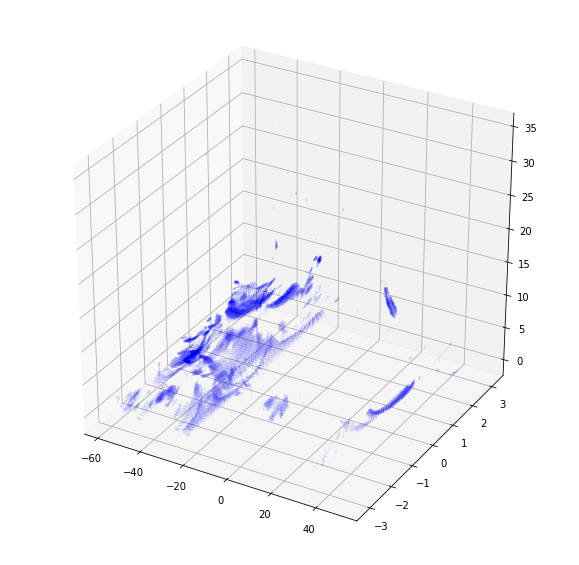

In [5]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.scatter(
    np.array(yot.a),
    np.array(yot.r),
    np.array(yot.t),
    label='curve in (x,y)',
    alpha=0.1, s=0.1, c='blue')

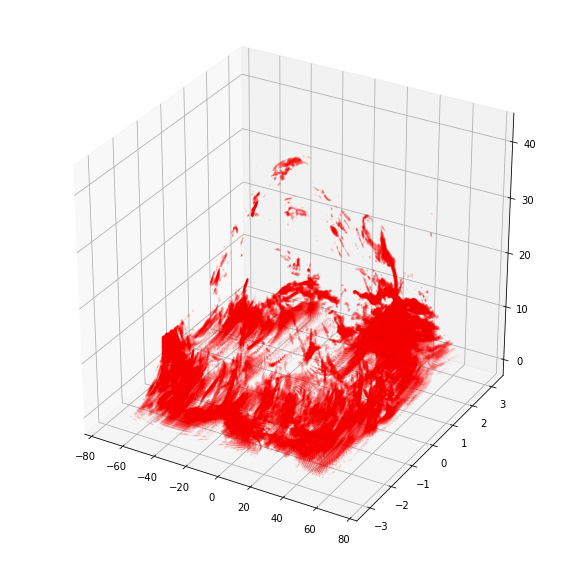

In [6]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.scatter(np.array(wt.a), np.array(wt.r), np.array(wt.t), label='curve in (x,y)', alpha=0.1, s=0.1, c='red')

In [7]:
yot2 = pd.read_csv('../Output-yot-01-17-10-24/you-too_02_AT.psi', delimiter=' ', header = 19, names = ['x', 'y', 'z', 'a', 'r', 't'], index_col = 0)
print(yot2.head())
print(np.shape(yot2))

           x         y         z          a         r         t
1 -14.771436 -4.136140 -6.381171  13.278325 -2.650418  8.769296
2 -16.051436 -5.050683 -4.877439  14.696485 -2.483093  8.253678
3 -16.051436 -5.133823 -4.740736  14.724071 -2.465332  8.202552
4 -16.211436 -5.216963 -4.604033  14.894493 -2.449843  8.178526
5 -16.211436 -5.300104 -4.467330  14.922516 -2.431738  8.132445
(40328, 6)


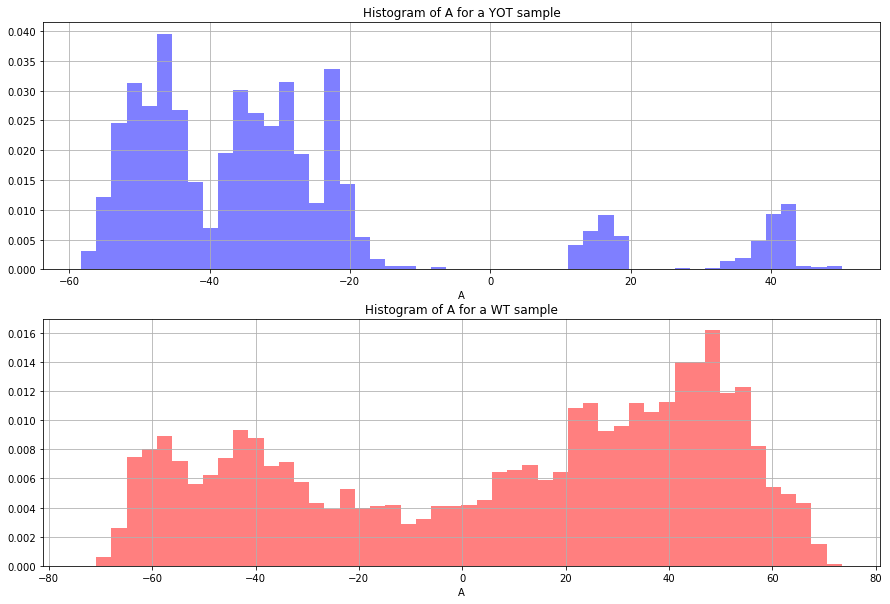

In [73]:
# the histogram of the data
plt.figure(figsize=(15, 10)) 
plt.subplot(2, 1, 1)
plt.hist(yot.a, 50, facecolor='b', alpha=0.5, normed=True)
plt.xlabel('A')
plt.title('Histogram of A for a YOT sample')
plt.grid(True)


plt.subplot(2, 1, 2)
plt.hist(wt.a, 50, facecolor='r', alpha=0.5, normed=True)
plt.xlabel('A')
plt.title('Histogram of A for a WT sample')
plt.grid(True)
plt.show()

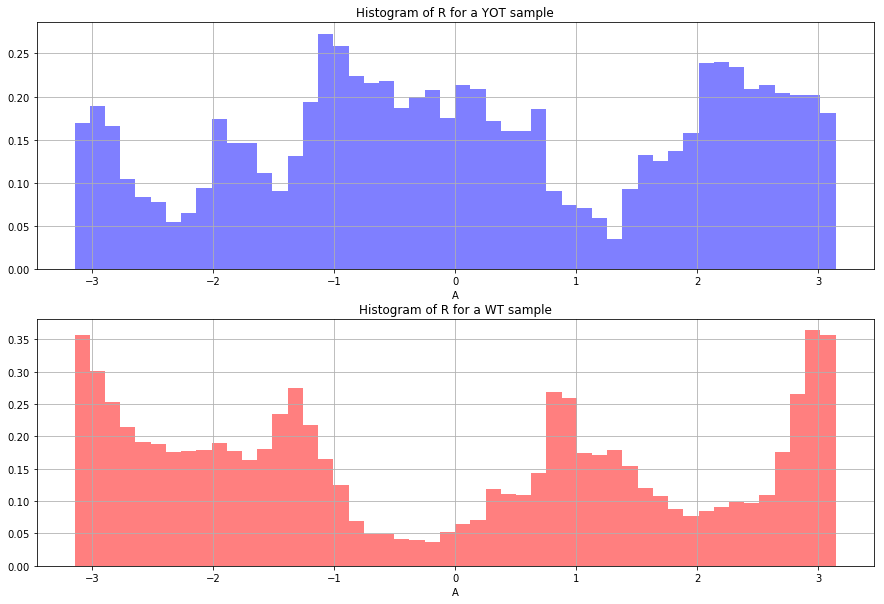

In [75]:
# the histogram of the data
plt.figure(figsize=(15, 10)) 
plt.subplot(2, 1, 1)
plt.hist(yot.r, 50, facecolor='b', alpha=0.5, normed=True)
plt.xlabel('A')
plt.title('Histogram of R for a YOT sample')
plt.grid(True)


plt.subplot(2, 1, 2)
plt.hist(wt.r, 50, facecolor='r', alpha=0.5, normed=True)
plt.xlabel('A')
plt.title('Histogram of R for a WT sample')
plt.grid(True)
plt.show()

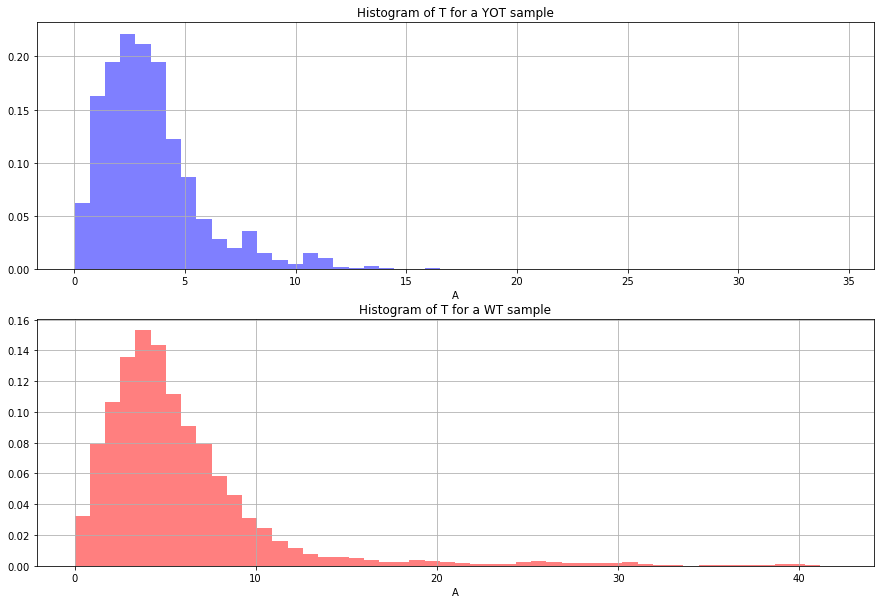

In [77]:
# the histogram of the data
plt.figure(figsize=(15, 10)) 
plt.subplot(2, 1, 1)
plt.hist(yot.t, 50, facecolor='b', alpha=0.5, normed=True)
plt.xlabel('A')
plt.title('Histogram of T for a YOT sample')
plt.grid(True)


plt.subplot(2, 1, 2)
plt.hist(wt.t, 50, facecolor='r', alpha=0.5, normed=True)
plt.xlabel('A')
plt.title('Histogram of T for a WT sample')
plt.grid(True)
plt.show()

# read in all wild types

### Create Brain Class

In [8]:
class Brain:
    def __init__(self):
        '''Initialize brain object'''

    def read_data(self,filepath):
        self.data = pd.read_csv(filepath, delimiter=' ', header = 19, names = ['x', 'y', 'z', 'a', 'r', 't'], index_col = 0)
    
    def get_bin_freq(self, bins, bin_num):
        bin_lower = bins[bin_num-1]
        bin_upper = bins[bin_num]
        subset = self.data
        subset = subset[np.logical_and(subset.a>bin_lower, subset.a<bin_upper)]
        return (len(subset)/len(self.data))

### Read in All Wild Types

In [9]:
A = []
R = []
T = []
wt_brains=[]

In [10]:
import os
folder_dir = '../Output-WT-01-17-10-21'
brain_names = os.listdir(folder_dir)

In [11]:
for brain in brain_names:
    if ('_AT' not in brain): continue
    print(brain)
    new_brain = Brain()
    new_brain.read_data(folder_dir+'/'+brain)
    wt_brains.append(new_brain)

wildtype_142_AT.psi
wildtype_121_AT.psi
wildtype_133_AT.psi
wildtype_105_AT.psi
wildtype_109_AT.psi
wildtype_117_AT.psi
wildtype_131_AT.psi
wildtype_123_AT.psi
wildtype_140_AT.psi
wildtype_115_AT.psi
wildtype_107_AT.psi
wildtype_119_AT.psi
wildtype_103_AT.psi
wildtype_111_AT.psi
wildtype_127_AT.psi
wildtype_139_AT.psi
wildtype_135_AT.psi
wildtype_113_AT.psi
wildtype_101_AT.psi
wildtype_129_AT.psi
wildtype_137_AT.psi
wildtype_125_AT.psi
wildtype_104_AT.psi
wildtype_116_AT.psi
wildtype_108_AT.psi
wildtype_120_AT.psi
wildtype_143_AT.psi
wildtype_132_AT.psi
wildtype_114_AT.psi
wildtype_118_AT.psi
wildtype_106_AT.psi
wildtype_130_AT.psi
wildtype_141_AT.psi
wildtype_122_AT.psi
wildtype_138_AT.psi
wildtype_126_AT.psi
wildtype_134_AT.psi
wildtype_102_AT.psi
wildtype_110_AT.psi
wildtype_136_AT.psi
wildtype_128_AT.psi
wildtype_124_AT.psi
wildtype_112_AT.psi


In [12]:
len(wt_brains)

43

In [13]:
for wt_brain in wt_brains:
    A.extend(wt_brain.data.a)
    R.extend(wt_brain.data.r)
    T.extend(wt_brain.data.t)

### Getting Bin Frequencies of A, R, T in wild types

In [14]:
bin_num = 50

In [15]:
hist_a, bin_edges_a = np.histogram(A, density=True, bins=bin_num)
hist_r, bin_edges_r = np.histogram(R, density=True, bins=bin_num)
hist_t, bin_edges_t = np.histogram(T, density=True, bins=bin_num)

In [100]:
bin_edges_a

array([-86.05173187, -82.5204022 , -78.98907253, -75.45774286,
       -71.92641319, -68.39508352, -64.86375385, -61.33242418,
       -57.80109451, -54.26976484, -50.73843517, -47.2071055 ,
       -43.67577583, -40.14444616, -36.61311649, -33.08178682,
       -29.55045715, -26.01912748, -22.48779781, -18.95646814,
       -15.42513847, -11.8938088 ,  -8.36247913,  -4.83114946,
        -1.29981979,   2.23150988,   5.76283955,   9.29416922,
        12.82549888,  16.35682855,  19.88815822,  23.41948789,
        26.95081756,  30.48214723,  34.0134769 ,  37.54480657,
        41.07613624,  44.60746591,  48.13879558,  51.67012525,
        55.20145492,  58.73278459,  62.26411426,  65.79544393,
        69.3267736 ,  72.85810327,  76.38943294,  79.92076261,
        83.45209228,  86.98342195,  90.51475162])

In [101]:
print(wt_brains[1].get_bin_freq(bin_edges_a,20))

0.00994408188373287


In [ ]:
freqs_a = []
freqs_r = []
freqs_t = []
for i in range(1,bin_num+1):
    freq_a = []
    freq_r = []
    freq_t = []
    for wt_brain in wt_brains:
        freq_a.append(wt_brain.get_bin_freq(bin_edges_a,i))
        freq_r.append(wt_brain.get_bin_freq(bin_edges_r,i))
        freq_t.append(wt_brain.get_bin_freq(bin_edges_t,i))
    freqs_a.append(freq_a)
    freqs_r.append(freq_r)    
    freqs_t.append(freq_t)    

In [112]:
yot = Brain()
yot.read_data('../Output-yot-01-17-10-24/you-too_01_AT.psi')
freq_yot_a=yot.get_bin_freq(bin_edges_a,40)
freq_yot_r=yot.get_bin_freq(bin_edges_r,40)
freq_yot_t=yot.get_bin_freq(bin_edges_t,40)
print(freq_yot_a)
print(freq_yot_r)
print(freq_yot_t)

0.0
0.0
0.013315951205885091


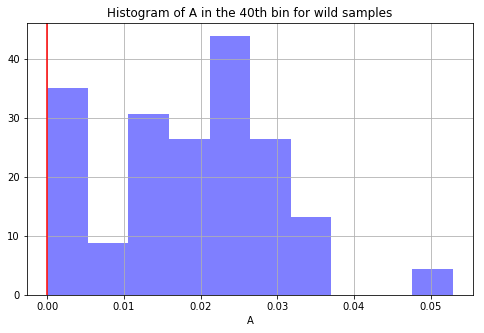

In [113]:
plt.figure(figsize=(8, 5))
plt.hist(freqs_a[40], facecolor='b', alpha=0.5, normed=True)
plt.xlabel('A')
plt.title('Histogram of A in the 40th bin for wild samples')
plt.grid(True)
plt.axvline(x=freq_yot_a, color='r')

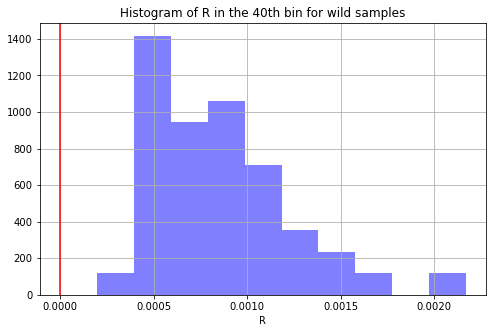

In [114]:
plt.figure(figsize=(8, 5))
plt.hist(freqs_r[40], facecolor='b', alpha=0.5, normed=True)
plt.xlabel('R')
plt.title('Histogram of R in the 40th bin for wild samples')
plt.grid(True)
plt.axvline(x=freq_yot_r, color='r')

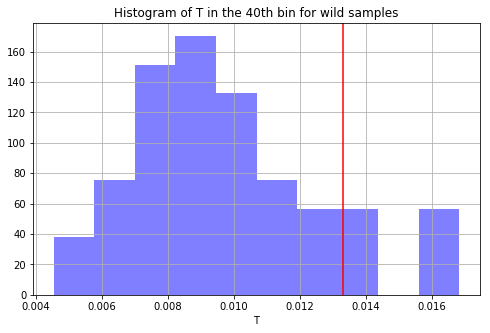

In [115]:
plt.figure(figsize=(8, 5))
plt.hist(freqs_t[40], facecolor='b', alpha=0.5, normed=True)
plt.xlabel('T')
plt.title('Histogram of T in the 40th bin for wild samples')
plt.grid(True)
plt.axvline(x=freq_yot_t, color='r')

### T-tests 

In [116]:
import scipy.stats as stats
stats.ttest_1samp(a= freqs_t[40], popmean= freq_yot_t)[1]

5.288159788390968e-10

In [119]:
abnormal_a_intervals = []
abnormal_r_intervals = []
abnormal_t_intervals = []

for bin in range(1,bin_num+1):
    freq_yot_a=wt_brain.get_bin_freq(bin_edges_a,bin)
    freq_yot_r=wt_brain.get_bin_freq(bin_edges_r,bin)
    freq_yot_t=wt_brain.get_bin_freq(bin_edges_t,bin)
    
    p_a = stats.ttest_1samp(a= freqs_a[bin-1], popmean= freq_yot_a)[1]
    p_r = stats.ttest_1samp(a= freqs_r[bin-1], popmean= freq_yot_r)[1]
    p_t = stats.ttest_1samp(a= freqs_t[bin-1], popmean= freq_yot_t)[1]
    if p_a < 0.05:
        abnormal_a_intervals.append(bin)
    if p_r < 0.05:
        abnormal_r_intervals.append(bin)
    if p_t < 0.05:
        abnormal_t_intervals.append(bin)
        
print(len(abnormal_a_intervals))
print(len(abnormal_r_intervals))
print(len(abnormal_t_intervals))

31
39
30
